<a href="https://colab.research.google.com/github/mardom/astrostatistics-2020/blob/main/TimeDomain2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of Periodic Time Series
We shall now focus on characterization of periodic time series. Many types of variable
stars show periodic flux variability; analysis of such stars is important both for
understanding stellar evolution and for using such stars as distance indicators (e.g.,
Cepheids and RR Lyrae stars).

The main goal of the analysis is to detect variability and to estimate the period and
its uncertainty. A periodic time series satisfies $y(t + P ) = y(t)$, where P is the period (assuming no noise). In the context of periodic variability, a convenient concept is the so-called phased light curve, where the data (and models) are plotted as function of
phase, 

$$\phi=\frac{t}{P}-int(\frac{t}{P})$$

where the function int(x) returns the integer part of x.

We begin discussion with analysis of a simple single harmonic model, including its relationship to the discrete Fourier transform and the Lomb–Scargle periodogram.
We then extend discussion to analysis of truncated Fourier series and provide an example of classification of periodic light curves.

## A Single Sinusoid Model
Given time series data $(t_1 , y_1), . . . , (t_N , y_N )$, we want to test whether it is consistent
with periodic variability and, if so, to estimate the period. In order to compute the posterior pdf for the frequency (or period) of a periodic variability sought in data, we need to adopt a specific model. We will first consider a simple model based on a single harmonic with angular frequency $\omega (= 2 \pi f = 2 \pi P )$,

$$y(y)=A sin (\omega t+ \phi)+ \epsilon $$

where the first term models the underlying process that generated the data and $\epsilon$ is measurement noise. Instead of using the phase $\phi$, it is possible to shift the time axis and write the argument as $\omega (t − t_o )$. In the context of subsequent analysis, it is practical to use trigonometric identities to rewrite this model as

$$y(t)=a sin(\omega t)+ b cos(\omega t)$$

where $A=(a^2+b^2)^{1/2}$ and $\phi=tan^{-1}(b/a)$. 

The model is now linear with respect to coefficients a and b, and nonlinear only with respect to frequency $\omega$. Determination
of these three parameters from the data is the main goal of the following derivation.

We fit this model to a set of data points $(t_j , y_j ), j = 1, . . . , N$ with noise $\epsilon$ described by homoscedastic Gaussian errors parametrized by $\sigma$. We will consider cases of both known and unknown $\sigma$ . Note that there is no assumption that the times $t_j$ are evenly sampled. Below, we will generalize this model to a case with heteroscedastic errors and an additional constant term in the assumed model (here, we will assume that the mean value was subtracted from “raw” data values to obtain
y_j , that is, y = 0; this may not work well in practice, as discussed below). We begin with this simplified case for pedagogical reasons, to better elucidate choices to be made in Bayesian analysis and its connections to classical power spectrum analysis.

For the same reasons, we provide a detailed derivation. Following the methodology we can write the data
likelihood as

$$L=p(t,y|\omega,a,b,\sigma)=\prod_{j=1}^{N}\frac{1}{\sqrt{2\pi}\sigma}exp(\frac{-[y_j-a sin(\omega t_j)- b cos(\omega t_j)]}{2 \sigma^2})$$

Although we assumed a Gaussian error distribution, if the only information about noise was a known value for the variance of its probability distribution, we would
still end up with a Gaussian distribution via the principle of maximum entropy.

 We shall assume uniform priors for $a, b, \omega$, and $\sigma$. Note that this choice of priors leads to nonuniform priors on $A$ and $\phi$. Nevertheless, the resulting pdfs are practically equal when data overwhelms the prior information. We will also assume that $\omega$ and $\sigma$ must be positive. The posterior pdf is

 $$p(\omega, a, b, \sigma, {t, y})\propto \sigma^{-N} exp(\frac{-NQ}{2 \sigma^2})$$

 where

 $$Q=V-\frac{2}{N}[aI(\omega)+bR(\omega)-abM(\omega)-\frac{1}{2}a^2S(\omega)-\frac{1}{1}b^2C(\omega)]$$

The following terms depend only on data and frequency $\omega$:

$$V(\omega)=\frac{1}{N}\sum_{j=1}^N y_j^2$$
$$I=\sum_{j=1}^{N} y_j sin(\omega t_j)$$
$$R(\omega)=\sum_{j=1}^{N} y_j cos(\omega t_j)$$
$$M(\omega)=\sum_{j=1}^{N}sin(\omega t_j)cos(\omega t_j)$$
$$S(\omega)=\sum_{j=1}^{N}sin^2(\omega t_j)$$
$$C(\omega)=\sum_{j=1}^{N}cos^2(\omega t_j)$$

When quantifying the evidence for periodicity, we are not interested in specific values of a and b. To obtain the two-dimensional posterior pdf for $\omega$ and $\sigma$, we
marginalize over the four-dimensional pdf

$$p(\omega, \sigma| [t,y])\propto \int p(\omega, a, b, \sigma, {t, y}) da db \propto \sigma^{-(N-2)} exp(\frac{-NV}{2\sigma^2}+\frac{P(\omega)}{\sigma^2})$$

where the periodogram $P(\omega)$ is given by 

$$P(\omega)=\frac{I^2(\omega)+R^2(\omega)}{N}$$

### The meaning of periodogram
We have not yet answered what is the best value of $\omega$ supported by the data, and whether the implied periodic variability is statistically significant. We can compute $\chi^2 (\omega)$ for a fit with $a = a_0=\frac{2I(\omega)}{N}$ and $b = b_0=\frac{2R(\omega)}{N} as

$$\chi^2(\omega)=\frac{1}{\sigma^2}\sum_{j=1}^{N}[y_j-y(t_j)]^2$$

It can be easily shown that:

$$\chi^2(\omega)=\chi^2_0[1-\frac{2P(\omega)}{NV}]$$

where $P(\omega)$ is the periodogram, and $\chi_0^2$ corresponds to a model
y(t) = constant (recall that here we assumed y = 0).

$$\chi_0^2=\frac{1}{\sigma^2}\sum_{j=1}^{N}y_j^2=\frac{NV}{\sigma^2}$$

This result motivates a renormalized definition of the periodogram as

$$P_{LS}=\frac{2}{NV}P(\omega)$$

where index LS stands for Lomb–Scargle periodogram, introduced and discussed below. With this renormalization, $0 ≤ P_{LS} (\omega) ≤ 1$, and thus the reduction in $\chi^2$ for the harmonic model, relative to $\chi^2$ for the pure noise model, $\chi_0^2$ , is

$$\frac{\chi^2(\omega)}{\chi_0^2(\omega)}=1-P_{LS}(\omega)$$

The relationship can be used to assess how well $P (\omega) $ estimates the true power spectrum. 
If the model is correct, then we expect that $\chi^2$ corresponding to the peak with maximum height, at $\omega = \omega_0$ , is $N$, with
a standard deviation of $\sqrt{2N}$ (assuming that N is sufficiently large so that this Gaussian approximation is valid). It is easy to show that the expected height of the peak is

$$P(\omega_0)=\frac{N}{4}(a_0^2+b_0^2)$$

with a standard deviation

$$\sigma_P(\omega_0)=\frac{\sigma^2}{\sqrt{2}}$$


An illustration of the impact of measurement errors $\sigma$ on $P_{LS}$ is shown in nexte figure . The measured PSD is a convolution of the true underlying PSD and the spectral window. As the measurement noise increases, the peak corresponding to the underlying frequency
in the data can become as small as the peaks in the spectral window; in this case, the underlying periodic variability becomes hard to detect.




        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]


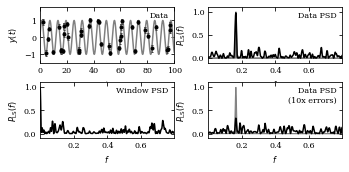

In [4]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from astroML.time_series import lomb_scargle

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
matplotlib.rcParams['axes.xmargin'] = 0

#------------------------------------------------------------
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)

#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
P_window = lomb_scargle(t_obs, y_window, 1, omega,
                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax = fig.add_subplot(221)
ax.plot(t, y, '-', c='gray')
ax.errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax.text(0.96, 0.92, "Data", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-1.5, 1.8)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

ax = fig.add_subplot(223)
ax.plot(omega, P_window, '-', c='black')
ax.text(0.96, 0.92, "Window PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(222)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs1, '-', c='black')
ax.text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(224)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs2, '-', c='black')
ax.text(0.96, 0.92, "Data PSD\n(10x errors)",
        ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()


### The significance of periodogram peaks
For a given $\omega$, the peak height, is a measure of the reduction in $\chi^2$ achieved by the model, compared to $\chi^2$ for a pure noise model. We can use BIC
and AIC information criteria to compare these two models. The difference in BIC is:

$$\Delta BIC =\chi^2_0-\chi^2(\omega_0)-(k_0-k_{\omega}ln(N))$$

where the number of free parameters is $k_0 = 1$ for the no-variability model (the mean value was subtracted) and $k_{\omega} = 4$ for a single harmonic model (it is assumed that the uncertainty for all free parameters decreases proportionally to $N^{−1/2$} ). For
homoscedastic errors,

$$\Delta BIC=\frac{NV P_{LS}(\omega_0)}{\sigma^2}-3 ln(N)$$

and simirlarly,

$$\Delta AIC=\frac{NV P_{LS}(\omega_0)}{\sigma^2}-6$$

Therefore, to answer the question “Did my data come from a periodic process?”, we need to compute $P_{LS} (\omega)$ first, and then the model odds ratio for a single sinusoid model vs. no-variability model. These results represent the foundations for analysis of unevenly periodic time series. Practical examples of this analysis are
discussed in the next section.

## Bayesian view of Fourier analysis
Now we can understand the results of Fourier analysis from a Bayesian viewpoint. The discrete Fourier PSD  corresponds to the periodogram $P (\omega)$, and the highest peak in the discrete Fourier PSD is an optimal frequency estimator for the case of a single harmonic model and homoscedastic Gaussian noise.

The discrete PSD gives optimal results if the following conditions are met:

1. The underlying variation is a single harmonic with constant amplitude and phase.
2. The data are evenly sampled and N is large.
3. Noise is Gaussian and homoscedastic.

The performance of the discrete PSD when these conditions are not met varies from suboptimal to simply impossible to use, as in cases of unevenly sampled data. In the rest of this chapter, we will consider examples that violate all three of these conditions.

## Practical application of the Lomb–Scargle periodogram
The underlying model of the Lomb–Scargle periodogram is nonlinear in frequency
 and basis functions at different frequencies are not orthogonal. As a result, the periodogram has many local maxima and thus in practice the global maximum of the
periodogram is found by grid search. 

The searched frequency range can be bounded by $\omega_{min} = 2\pi /T_{data}$ , where $T_{data} = t_{max} − t_{min}$ is the interval sampled by the data, and by $\omega_{max}$ . As a good choice for the maximum search frequency, a pseudo-Nyquist frequency $ω_{max} = \bar{\pi/ \Delta t}$, where $\bar{1/ \Delta t}$ is the median of the inverse time interval between data points, (in the case of even sampling, $\omega_{max}$ is equal to the Nyquist frequency). In practice, this choice may be a gross underestimate because unevenly sampled data can detect periodicity with frequencies even higher
than $2\pi/( \Delta t_{min}$. An appropriate choice of $ω_{max}$ thus depends on sampling (the phase coverage at a given frequency is the relevant quantity) and needs to be carefully chosen: a hard limit on maximum detectable frequency is of course given by the time interval over which individual measurements are performed, such as imaging exposure time.

The frequency step can be taken as proportional to $\omega_{min}$ , $\omega = \nu \omega_{min}$ , with
$\nu ∼ 0.1$. A linear regular grid for $\omega$ is a good choice because the width of peaks in $P_{LS} (\omega)$ does not depend on $\omega_0$. Note that in practice the ratio $ω_{max} /ω_{min}$
can be very large (often exceeding $10^5$) and thus lead to many trial frequencies (the grid step must be sufficiently small to resolve the peak; that is, $\omega$ should not be
larger than $\sigma_{\omega}$ ). 

        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


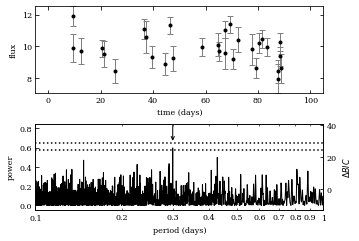

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)
N = 30
P = 0.3

t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.35)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()


### False alarm probability
The derivation assumed that $ω_0$ was given (i.e., known). However, to
find 
$\omega_0$ using data, $P_LS (\omega)$ is evaluated for many different values of $\omega$ and thus the
false alarm probability (FAP, the probability that $P_{LS} (\omega_0)$ is due to chance) will reflect
the multiple hypothesis testing. Even when the noise in the data is
homoscedastic and Gaussian, an analytic estimator for the FAP for general uneven sampling does not exist.

A straightforward method for computing the FAP that relies on nonparametric bootstrap resampling was recently discussed. T


https://deepmind.com/blog/article/alphafold-a-solution-to-a-50-year-old-grand-challenge-in-biology

## Generalized Lomb–Scargle periodogram
There is an important practical deficiency in the original Lomb–Scargle method described above: it is implicitly assumed that the mean of data values, $y$, is a good
estimator of the mean of $y(t)$. In practice, the data often do not sample all the phases equally, the data set may be small, or it may not extend over the whole duration of
a cycle: the resulting error in mean can cause problems such as aliasing.

A simple remedy proposed  is to add a constant offset term to the model. Zechmeister and Kürster  have derived an analytic treatment
of this approach, dubbed the “generalized” Lomb–Scargle periodogram https://arxiv.org/abs/0901.2573. The resulting expressions have a similar structure to the equations corresponding to the standard Lomb–Scargle approach listed above and are not reproduced here. Zechmeister and Kürster also discuss other methods, such as the floating-mean method and compensated discrete Fourier transform, and show that they are by and large equivalent to the generalized Lomb–Scargle method.

Both the standard and generalized Lomb–Scargle methods are implemented in AstroML. Next Figure compares the two in a worst-case scenario where the data sampling is such that the standard method grossly overestimates the mean. While the
standard approach fails to detect the periodicity due to the unlucky data sampling, the generalized Lomb–Scargle approach still recovers the expected signal. Though
this example is quite contrived, it is not entirely artificial: in practice one could easily
end up in such a situation if the period of the object in question were on the order of one day, such that minima occur only during daylight hours during the period of
observation.

        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle instead. [__main__]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [__main__]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


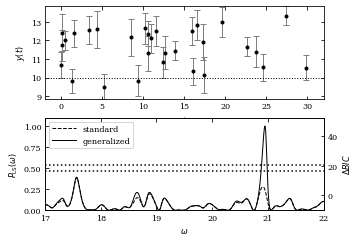

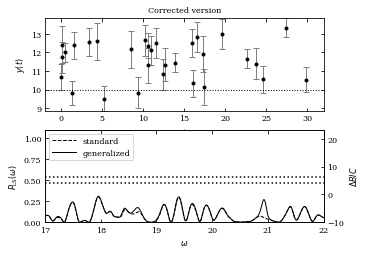

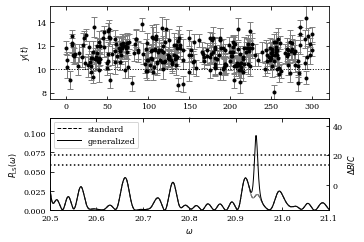

In [6]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import \
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate data where y is positive
np.random.seed(0)
N = 30
P = 0.3

t = P / 2 * np.random.random(N) + P * np.random.randint(100, size=N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = y + np.random.normal(dy)

omega_0 = 2 * np.pi / P

#######################################################################
# Generate the plot with and without the original typo

for typo in [True, False]:
    #------------------------------------------------------------
    # Compute the Lomb-Scargle Periodogram
    sig = np.array([0.1, 0.01, 0.001])
    omega = np.linspace(17, 22, 1000)

    # Notice the typo: we used y rather than y_obs
    if typo is True:
        P_S = lomb_scargle(t, y, dy, omega, generalized=False)
        P_G = lomb_scargle(t, y, dy, omega, generalized=True)
    else:
        P_S = lomb_scargle(t, y_obs, dy, omega, generalized=False)
        P_G = lomb_scargle(t, y_obs, dy, omega, generalized=True)

    #------------------------------------------------------------
    # Get significance via bootstrap
    D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                               N_bootstraps=1000, random_state=0)
    sig1, sig5 = np.percentile(D, [99, 95])

    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(5, 3.75))

    # First panel: input data
    ax = fig.add_subplot(211)
    ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
    ax.plot([-2, 32], [10, 10], ':k', lw=1)

    ax.set_xlim(-2, 32)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y(t)$')

    if typo is False:
        ax.set_title('Corrected version')

    # Second panel: periodogram
    ax = fig.add_subplot(212)
    ax.plot(omega, P_S, '--k', lw=1, label='standard')
    ax.plot(omega, P_G, '-k', lw=1, label='generalized')
    ax.legend(loc=2)

    # plot the significance lines.
    xlim = (omega[0], omega[-1])
    ax.plot(xlim, [sig1, sig1], ':', c='black')
    ax.plot(xlim, [sig5, sig5], ':', c='black')

    # label BIC on the right side
    ax2 = ax.twinx()
    ax2.set_ylim(tuple(lomb_scargle_BIC(ax.get_ylim(), y_obs, dy)))
    ax2.set_ylabel(r'$\Delta BIC$')

    ax.set_xlabel('$\omega$')
    ax.set_ylabel(r'$P_{\rm LS}(\omega)$')
    ax.set_xlim(xlim)
    ax.set_ylim(0, 1.1)


#######################################################################
# Redo the plot without the typo
# We need a larger data range to actually get significant power
# with actual noisy data

#------------------------------------------------------------
# Generate data where y is positive
np.random.seed(0)
N = 300
P = 0.3

t = P / 2 * np.random.random(N) + P * np.random.randint(1000, size=N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = y + np.random.normal(dy)

omega_0 = 2 * np.pi / P


#------------------------------------------------------------
# Compute the Lomb-Scargle Periodogram
sig = np.array([0.1, 0.01, 0.001])
omega = np.linspace(20.5, 21.1, 1000)

P_S = lomb_scargle(t, y_obs, dy, omega, generalized=False)
P_G = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))

# First panel: input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.plot([-20, 320], [10, 10], ':k', lw=1)

ax.set_xlim(-20, 320)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

# Second panel: periodogram
ax = fig.add_subplot(212)
ax.plot(omega, P_S, '--k', lw=1, label='standard')
ax.plot(omega, P_S, '-', c='gray', lw=1)
ax.plot(omega, P_G, '-k', lw=1, label='generalized')
ax.legend(loc=2)

# plot the significance lines.
xlim = (omega[0], omega[-1])
ax.plot(xlim, [sig1, sig1], ':', c='black')
ax.plot(xlim, [sig5, sig5], ':', c='black')

# label BIC on the right side
ax2 = ax.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax.set_xlabel('$\omega$')
ax.set_ylabel(r'$P_{\rm LS}(\omega)$')
ax.set_xlim(xlim)
ax.set_ylim(0, 0.12)

plt.show()

## Truncated Fourier Series Model
What happens if data have an underlying variability that is more complex than a single sinusoid? Is the Lomb–Scargle periodogram still an appropriate model to search for periodicity? We address these questions by considering a multiple
harmonic model.

Next Figure  shows phased light curves for six stars from the
LINEAR data set, with periods estimated using the Lomb–Scargle periodogram. In most cases the phased light curves are smooth and indicate that a correct period has
been found, despite significant deviation from a single sinusoid shape. A puzzling case can be seen in the top-left panel where something is clearly wrong: at $\phi ∼ 0.6$ the phased light curve has two branches! We will first introduce a tool to treat such
cases, and then discuss it in more detail.

The single sinusoid model can be extended to include M Fourier terms,
$$y(t)=b_0+\sum_{m=1}^M a_m sin(m \omega y)+b_m cos( m \omega t)$$

Following the steps from the single harmonic case, it can be easily shown that in this case the periodogram is (normalized to the 0–1 range)

$$P_M(\omega)=\frac{2}{V}\sum_{m=1}^{M} [R^2_m(\omega)+I^2_m(\omega)]$$

where

$$I_m(\omega)=\sum_{=j1}^{N}w_j y_j sin(m \omega t_j)$$

and

$$R_m(\omega)=\sum_{=j1}^{N}w_j y_j  cos(m \omega t_j)$$







@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
 - computing power for 14752041 (253 points)


        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


 - computing power for 1009459 (593 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 11375941 (280 points)
 - computing power for 18525697 (211 points)
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 10.20062676
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277
 - omega_0 = 10.82722772


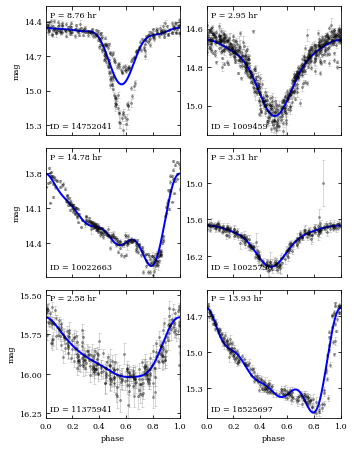

In [7]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
import matplotlib
matplotlib.rc('_internal', classic_mode=True)

#------------------------------------------------------------
# Load the dataset
data = fetch_LINEAR_sample()
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]


#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for {0} ({1} points)".format(i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

#------------------------------------------------------------
# Plot the phased light-curves
fig = plt.figure(figsize=(5, 6.5))
fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

for i in range(6):
    # get the data and best-fit angular frequency
    t, y, dy = data[ids[i]].T
    omega, power = results[ids[i]]
    omega_best = omega[np.argmax(power)]
    print(" - omega_0 = %.10g" % omega_best)

    # do a fit to the first 4 Fourier components
    mtf = MultiTermFit(omega_best, 4)
    mtf.fit(t, y, dy)
    phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

    # plot the phased data and best-fit curves
    ax = fig.add_subplot(321 + i)
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5, alpha=0.3)
    ax.plot(phase_fit, y_fit, 'b', markeredgecolor='b', lw=2, fillstyle='top', linestyle='solid')

    ax.set_xlim(0, 1)
    ax.set_ylim(plt.ylim()[::-1])
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
            transform=ax.transAxes)
    ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
            ha='left', va='top',
            transform=ax.transAxes)

    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i % 2 == 0:
        ax.set_ylabel('mag')

    if i in (4, 5):
        ax.set_xlabel('phase')

plt.show()

It is clear  that the periodogram $P_M (\omega)$ increases with M at all frequencies $\omega$. The reason for this increase is that more terms allow for more fidelity and thus produce a smaller $\chi^2$. Indeed, the input data could be exactly reproduced with $M = N/2 − 1$.

Next figure compares the periodograms and phased light curves for the problematic case from the top-left panel,  using M = 1 and M = 6.

The single sinusoid model (M = 1) is so different from the true signal shape that it results in an incorrect period equal to 1/2 of the true period. The reason is that
the underlying light curve has two minima (this star is an Algol-type eclipsing binary star) and a single sinusoid model produces a smaller $\chi^2$  than for the pure noise model when the two minima are aligned, despite the fact that they have different depths. The
M = 6 model is capable of modeling the two different minima, as well as flat parts of the light curve, and achieves a lower $\chi^2$ for the correct period than for its alias favored by the M = 1 model. Indeed, the correct period is essentially unrecognizable in the power spectrum of the M = 1 model. Therefore, when the signal shape significantly
differs from a single sinusoid, the Lomb–Scargle periodogram may easily fail (this is true both for the original and generalized implementations).

As this example shows, a good method for recognizing that there might be a
problem with the best period is to require the phased light curve to be smooth. This requirement forms the basis for the so-called minimum string length (MSL) method and the phase dispersion minimization (PDM) method. Both
methods are based on analysis of the phased light curve: the MSL measures the length
of the line connecting the points, and the PDM compares the interbin variance to the
sample variance. Both metrics are minimized for smooth phased light curves.


        Use astropy.stats.LombScargle instead. [__main__]


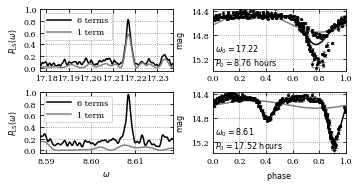

In [8]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from astroML.time_series import multiterm_periodogram, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
matplotlib.rcParams['axes.xmargin'] = 0

#------------------------------------------------------------
# Get data
data = fetch_LINEAR_sample()
t, y, dy = data[14752041].T

#------------------------------------------------------------
# Do a single-term and multi-term fit around the peak
omega0 = 17.217
nterms_fit = 6

# hack to get better phases: this doesn't change results,
#  except for how the phase plots are displayed
t -= 0.4 * np.pi / omega0

width = 0.03
omega = np.linspace(omega0 - width - 0.01, omega0 + width - 0.01, 1000)

#------------------------------------------------------------
# Compute periodograms and best-fit solutions
#  factor gives the factor that we're dividing the fundamental frequency by
factors = [1, 2]
nterms = [1, 6]

# Compute PSDs for factors & nterms
PSDs = dict()
for f in factors:
    for n in nterms:
        PSDs[(f, n)] = multiterm_periodogram(t, y, dy, omega / f, n)

# Compute the best-fit omega from the 6-term fit
omega_best = dict()
for f in factors:
    omegaf = omega / f
    PSDf = PSDs[(f, 6)]
    omega_best[f] = omegaf[np.argmax(PSDf)]

# Compute the best-fit solution based on the fundamental frequency
best_fit = dict()
for f in factors:
    for n in nterms:
        mtf = MultiTermFit(omega_best[f], n)
        mtf.fit(t, y, dy)
        phase_best, y_best = mtf.predict(1000, adjust_offset=False)

        best_fit[(f, n)] = (phase_best, y_best)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.95, hspace=0.35)

for i, f in enumerate(factors):
    P_best = 2 * np.pi / omega_best[f]
    phase_best = (t / P_best) % 1

    # first column: plot the PSD
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.plot(omega / f, PSDs[(f, 6)], '-', c='black', label='6 terms')
    ax1.plot(omega / f, PSDs[(f, 1)], '-', c='gray', label='1 term')
    ax1.grid(color='gray')
    ax1.legend(loc=2)

    ax1.axis('tight')

    ax1.set_ylim(-0.05, 1.001)
    ax1.xaxis.set_major_locator(plt.MultipleLocator(0.01))
    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

    # second column: plot the phased data & fit
    ax2 = fig.add_subplot(222 + 2 * i)
    ax2.errorbar(phase_best, y, dy, fmt='.k', ms=4, ecolor='gray', lw=1,
                 capsize=1.5)
    ax2.plot(best_fit[(f, 1)][0], best_fit[(f, 1)][1], '-', c='gray')
    ax2.plot(best_fit[(f, 6)][0], best_fit[(f, 6)][1], '-', c='black')

    ax2.text(0.02, 0.02, (r"$\omega_0 = %.2f$" % omega_best[f] + "\n"
                          + r"$P_0 = %.2f\ {\rm hours}$" % (24 * P_best)),
             ha='left', va='bottom', transform=ax2.transAxes)

    ax2.grid(color='gray')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(plt.ylim()[::-1])
    ax2.yaxis.set_major_locator(plt.MultipleLocator(0.4))

    # label both axes
    ax1.set_ylabel(r'$P_{\rm LS}(\omega)$')
    ax2.set_ylabel(r'${\rm mag}$')
    if i == 1:
        ax1.set_xlabel(r'$\omega$')
        ax2.set_xlabel(r'${\rm phase}$')

plt.show()

The key to avoiding such pitfalls is to use a more complex model, such as a truncated Fourier series (or a template, if known in advance, or a nonparametric model, such as discussed in the following section). How do we choose an appropriate
M for a truncated Fourier series? We can extend the analysis from the previous section and compare the BIC and AIC value for the model M to those for the novariability model $y(t) = b_0$. The difference in BIC

        Use astropy.stats.LombScargle instead. [__main__]


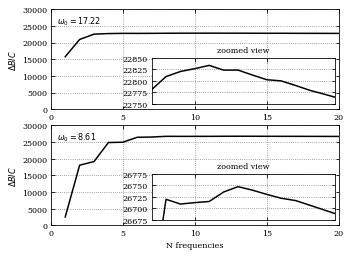

In [9]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import multiterm_periodogram, lomb_scargle_BIC
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch the data
data = fetch_LINEAR_sample()

t, y, dy = data[14752041].T
omega0 = 17.217

# focus only on the region with the peak
omega1 = np.linspace(17.213, 17.220, 100)
omega2 = 0.5 * omega1

#------------------------------------------------------------
# Compute the delta BIC
terms = np.arange(1, 21)
BIC_max = np.zeros((2, len(terms)))

for i, omega in enumerate([omega1, omega2]):
    for j in range(len(terms)):
        P = multiterm_periodogram(t, y, dy, omega, terms[j])
        BIC = lomb_scargle_BIC(P, y, dy, n_harmonics=terms[j])
        BIC_max[i, j] = BIC.max()

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))

ax = [fig.add_axes((0.15, 0.53, 0.8, 0.37)),
      fig.add_axes((0.15, 0.1, 0.8, 0.37))]
ax_inset = [fig.add_axes((0.15 + 7 * 0.04, 0.55, 0.79 - 7 * 0.04, 0.17)),
            fig.add_axes((0.15 + 7 * 0.04, 0.12, 0.79 - 7 * 0.04, 0.17))]
ylims = [(22750, 22850),
         (26675, 26775)]
omega0 = [17.22, 8.61]

for i in range(2):
    # Plot full panel
    ax[i].plot(terms, BIC_max[i], '-k')
    ax[i].set_xlim(0, 20)
    ax[i].set_ylim(0, 30000)
    ax[i].text(0.02, 0.95, r"$\omega_0 = %.2f$" % omega0[i],
               ha='left', va='top', transform=ax[i].transAxes)

    ax[i].set_ylabel(r'$\Delta BIC$')
    if i == 1:
        ax[i].set_xlabel('N frequencies')
    ax[i].grid(color='gray')

    # plot inset
    ax_inset[i].plot(terms, BIC_max[i], '-k')
    ax_inset[i].xaxis.set_major_locator(plt.MultipleLocator(5))
    ax_inset[i].xaxis.set_major_formatter(plt.NullFormatter())
    ax_inset[i].yaxis.set_major_locator(plt.MultipleLocator(25))
    ax_inset[i].yaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
    ax_inset[i].set_xlim(7, 19.75)
    ax_inset[i].set_ylim(ylims[i])
    ax_inset[i].set_title('zoomed view')
    ax_inset[i].grid(color='gray')

plt.show()

# Classification of Periodic Light Curves
As illustrated, stellar light curves often have distinctive shapes (e.g.,
such as skewed light curves of RR Lyrae type ab stars, or eclipsing binary stars).

In addition to shapes, the period and amplitude of the light curve also represent distinguishing characteristics. With large data sets, it is desirable and often unavoidable to use machine learning methods for classification (as opposed to manual/visual
classification). In addition to light curves, other data such as colors are also used in
classification.

Classification methods can be divided into supervised and unsupervised. With supervised methods we provide a training
sample, with labels such as “RR Lyrae”, “Algol type”, “Cepheid” for each light curve, and then seek to assign these labels to another data set (essentially, we ask, “Find
me more light curves such as this one in the new sample.”). With unsupervised methods, we provide a set of attributes and ask if the data set displays clustering in the
multidimensional space spanned by these attributes. As practical examples, below we discuss unsupervised clustering and classification of variable stars with light curves found in the LINEAR data set, augmented with photometric (color) data from the
SDSS and 2MASS surveys.

The Lomb–Scargle periodogram fits a single harmonic. If the
underlying time series includes higher harmonics, a more general model than a single sinusoid should be used to better describe the data and obtain a more robust
period, as discussed in the preceding section. As an added benefit of the improved
modeling, the amplitudes of Fourier terms can be used to efficiently classify light curves. In some sense, fitting a low-M Fourier series to data represents an example of the dimensionality reduction techniques discussed in
chapter 7. Of course, it is not necessary to use Fourier series and other methods have been proposed, such as direct analysis of folded light curves using PCA: https://arxiv.org/abs/0903.3500.

Given the best period, $P = 2 \pi / \omega_0$ , determined from the M-term periodogram
$P_M (\omega)$ (with M either fixed a priori, or determined in each case using BIC/AIC criteria), a model based on the first M Fourier harmonics can be fit to the data. 
Since $\omega_0$ is assumed known, this model is linear in terms of (2M + 1) unknown coefficients $a_j$ and $b_j$ and thus the fitting can be performed rapidly. Given $a_m$ and $b_m$, useful attributes for the classification of light curves are the amplitudes of each harmonic:

$$A_m=(a_m^2+b_m^2)^{1/2}$$

and phases,

$$\phi_m=atan(b_m, a_m)$$

It is customary to define the zero phase to correspond to the maximum, or the minimum, of a periodic light curve.

We now return to the specific example of the LINEAR data.
Next Figures show the results of a Gaussian mixture clustering analysis
which attempts to find self-similar (or compact) classes of about 6000 objects without using any training sample. The main idea is that different physical classes of objects
(different types of variable stars) might be clustered in the multidimensional attribute
space. If we indeed identify such clusters, then we can attempt to assign them a physical meaning.

![fig_LINEAR_clustering_1.png](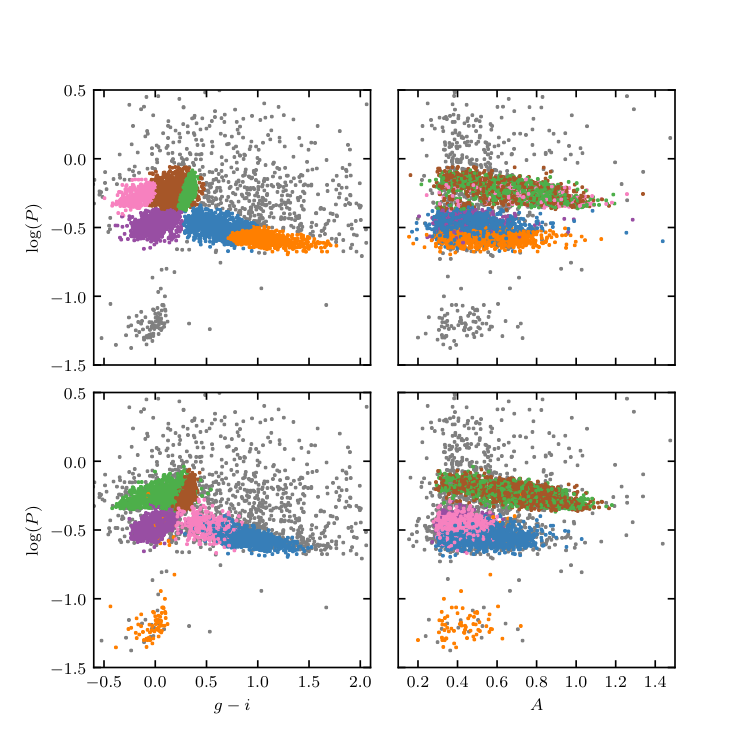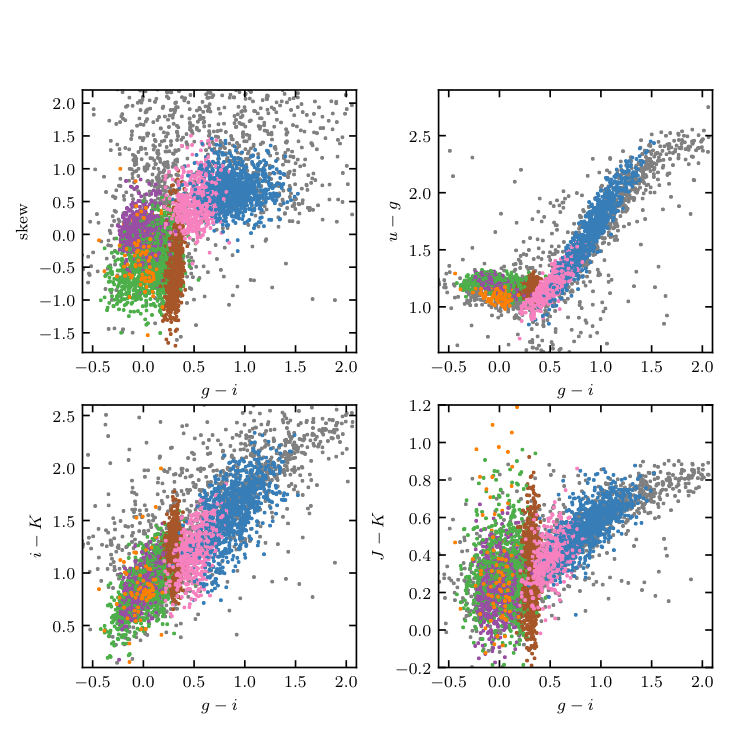)


To contrast this unsupervised clustering with classification based on a train-
ing sample, light-curve types for the LINEAR data set based on visual (manual)
classification by domain experts are utilized with two machine learning methods:
a Gaussian mixture model Bayes classifier and a SVM classifier.

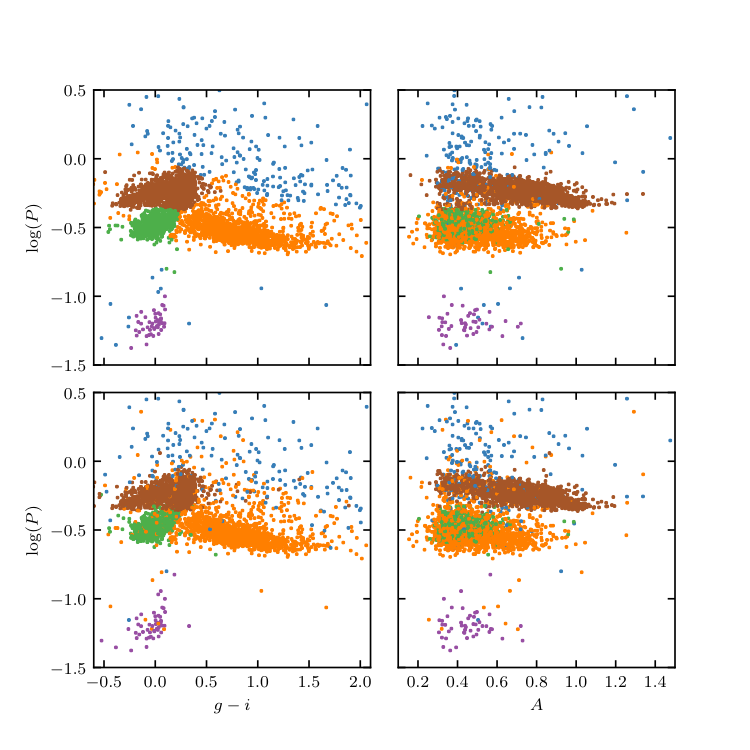


## Autoregressive Models
Autocorrelated time series can be analyzed and characterized using stochastic “autoregressive models.” Autoregressive models provide a good general description of
processes that “retain memory” of previous states (but are not periodic). An example of such a model is the random walk, where each new value is obtained by adding
noise to the preceding value.

The random walk can be generalized to the linear autoregressive (AR) model with dependencies on k past values (i.e., not just one as in the case of random walk). An autoregressive process of order k, AR(k), for a discrete data set is defined by:

$$y_i=\sum_{j=1}^{k} a_j y_{i-j}+\epsilon_i$$

The literature on autoregressive models is abundant because applications vary from signal processing and general engineering to stock-market modeling. Related
modeling frameworks include the moving average (MA, where y i depends only on past values of noise), autoregressive moving average (ARMA, a combination
of AR and MA processes), autoregressive integrated moving average (ARIMA, a
combination of ARMA and random walk), and state-space or dynamic linear
modeling (so-called Kalman filtering).

For example, a simple but astronomically very relevant problem is distinguishing a random walk from pure noise. That is, given a time series, the question is whether it better supports the hypothesis that a 1 = 0 (noise) or that a 1 = 1 (random walk).


In [3]:
!pip install astroML

     |████████████████████████████████| 112kB 12.4MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=75d7091f8b98700e8657fd9c8d1d545a8484a8475d0d3e4a6cd8bb02f40f5d51
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML
